# CREDIT CARD FRAUD DETECTION

In [17]:
import numpy as np 
import pandas as pd

In [18]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
#print class 1 records
df[df['Class'] == 1].tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


these v1,v2,v3 are features that have been embedded and pca reduced

In [22]:
#data distribution
import matplotlib.pyplot as plt
import seaborn as sns

df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [23]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [24]:
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Now try to understand how the v1,v2 influences the probability of being fraud or non-fraud

In [25]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Undersampling

Since the dataset is highly imbalanced, we should take our samples in a way such that the legit and fraud records are equal in number.


In [26]:
legit_sample = legit.sample(n=492) #492 is the number of fraud cases
new_df = pd.concat([legit_sample, fraud], axis=0)
legit_sample.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,93378.747967,0.001568,-0.021534,0.060334,0.043179,-0.032822,0.005985,-0.088529,0.001876,-0.004879,...,-0.009067,0.021829,0.016726,0.008022,-0.004915,0.018186,0.006432,0.024579,91.554776,0.0
std,48296.176547,1.855210,1.706435,1.456538,1.472498,1.394140,1.424025,1.277906,1.431175,1.060725,...,0.643086,0.755132,0.507518,0.572594,0.515256,0.444025,0.378443,0.236282,290.484423,0.0
min,211.000000,-11.797858,-16.978964,-7.770538,-4.072605,-6.116574,-11.456748,-10.370542,-18.717619,-3.437528,...,-6.116007,-2.551384,-4.041931,-2.172394,-2.161822,-1.035957,-5.045247,-1.578614,0.000000,0.0
25%,51760.750000,-0.978047,-0.573785,-0.683017,-0.813207,-0.739066,-0.777210,-0.601423,-0.192477,-0.641221,...,-0.235486,-0.556936,-0.139630,-0.322873,-0.309427,-0.286852,-0.068562,-0.045404,5.760000,0.0
50%,80464.000000,0.020428,0.040609,0.268599,0.032480,-0.084785,-0.314119,0.003427,0.046346,-0.020565,...,-0.001546,0.056382,-0.009606,0.044234,0.039799,-0.013297,0.002051,0.012773,22.420000,0.0
75%,139732.750000,1.330075,0.779781,1.069887,0.712244,0.590814,0.466594,0.528707,0.366565,0.696419,...,0.193032,0.566053,0.154728,0.414037,0.358244,0.240948,0.082466,0.087091,81.177500,0.0
max,172334.000000,2.271188,7.296069,3.186011,5.565240,16.024460,5.578700,6.256525,6.261068,4.141914,...,5.441096,2.650101,4.146384,1.205581,2.152215,1.354315,1.911967,1.909819,4675.000000,0.0


In [27]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93378.747967,0.001568,-0.021534,0.060334,0.043179,-0.032822,0.005985,-0.088529,0.001876,-0.004879,...,0.070260,-0.009067,0.021829,0.016726,0.008022,-0.004915,0.018186,0.006432,0.024579,91.554776
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

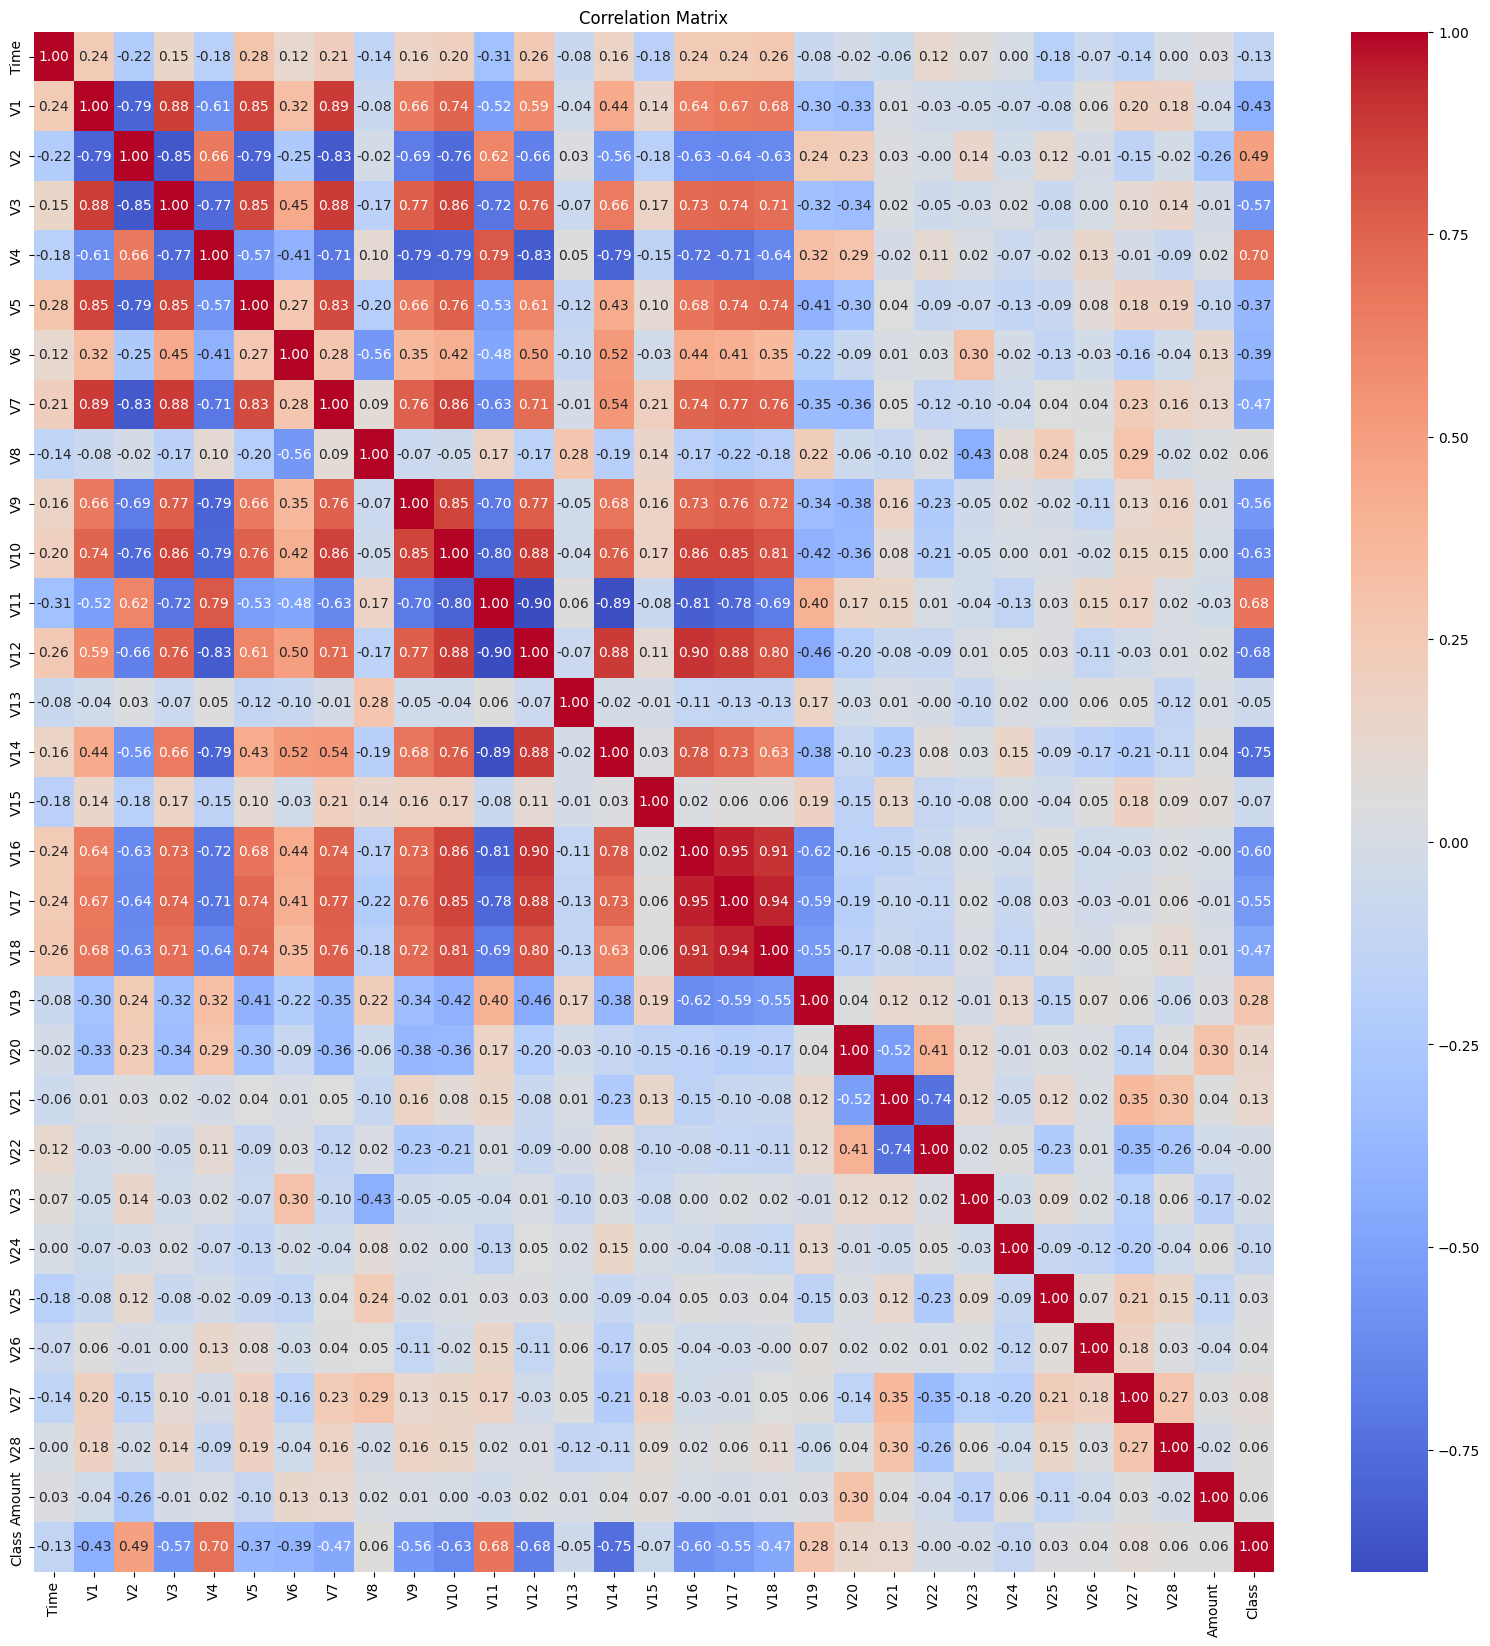

In [29]:
#correlation matrix
corr_matrix = new_df.corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Splitting the data sets into independent and dependent features

In [30]:
x=new_df.drop(columns='Class', axis=1)
y=new_df['Class']

We'll take 2 paths, in one we'll continue with all the features and in the other we'll drop redundant columns

### Without reducing redundant columns

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

c:\Users\Shuvradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### performance metrics

In [32]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score
print("Test data accuracy",accuracy_score(y_test, y_pred))
print("Train data accuracy",accuracy_score(y_train, y_pred_train))

Test data accuracy 0.9390862944162437
Train data accuracy 0.9504447268106735


If accuracy score of training data and test data is very different, it meeans that our model has underfitted or overefitted

since our data is very imbalanced, we need to use AUPRC

In [33]:
from sklearn.metrics import roc_auc_score, average_precision_score
print("Train data AUC",roc_auc_score(y_train, y_pred_train))
print("Test data AUC",roc_auc_score(y_test, y_pred))
print("Train data average precision",average_precision_score(y_train, y_pred_train))
print("Test data average precision",average_precision_score(y_test, y_pred))

Train data AUC 0.9504817814288113
Test data AUC 0.9388785817357247
Train data average precision 0.940843151733546
Test data average precision 0.9287659564671893


If we don't take 492 legit values but take the entire thing

In [34]:
x1=df.drop(columns='Class', axis=1)
y1=df['Class']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
model1 = LogisticRegression()
model1.fit(x_train1, y_train1)
y_pred1 = model1.predict(x_test1)
y_pred_train1=model1.predict(x_train1)
print("Test data accuracy",accuracy_score(y_test1, y_pred1))
print("Train data accuracy",accuracy_score(y_train1, y_pred_train1))
print("Train data AUC",roc_auc_score(y_train1, y_pred_train1))
print("Test data AUC",roc_auc_score(y_test1, y_pred1))
print("Train data average precision",average_precision_score(y_train1, y_pred_train1))
print("Test data average precision",average_precision_score(y_test1, y_pred1))

Test data accuracy 0.9986306660580738
Train data accuracy 0.998990541815708
Train data AUC 0.8335387158860813
Test data AUC 0.7803044930690339
Train data average precision 0.48553582951728796
Test data average precision 0.34372541076634533


c:\Users\Shuvradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


If we drop redundant columns,such as v8,v13,v15,v22,v23,v25,v26,v27,v28

In [40]:
#drop columns v8,v13,v15,v22,v23,v25,v26,v27,v28
#x2=new_df.drop(columns=['Class','V8','V13','V15','V22','V23','V25','V26','V27','V28'], axis=1)
#y2=new_df['Class']
X2=new_df.drop(columns='Amount', axis=1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
model2 = LogisticRegression()
model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)
y_pred_train2=model2.predict(x_train2)
print("Test data accuracy",accuracy_score(y_test2, y_pred2))
print("Train data accuracy",accuracy_score(y_train2, y_pred_train2))
print("Train data AUC",roc_auc_score(y_train2, y_pred_train2))
print("Test data AUC",roc_auc_score(y_test2, y_pred2))
print("Train data average precision",average_precision_score(y_train2, y_pred_train2))
print("Test data average precision",average_precision_score(y_test2, y_pred2))

Test data accuracy 0.9441624365482234
Train data accuracy 0.9479034307496823
Train data AUC 0.9479372521667249
Test data AUC 0.9439806225520511
Train data average precision 0.9360096232467462
Test data average precision 0.9338889122894095


c:\Users\Shuvradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lets try to do this with NAIVE BIAS

In [41]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
y_pred_train=gnb.predict(x_train)
print("Test data accuracy  using gnb",accuracy_score(y_test, y_pred))
print("Train data accuracy using gnb",accuracy_score(y_train, y_pred_train))
print("precision using gnb",precision_score(y_test, y_pred))
print("recall using gnb",recall_score(y_test, y_pred))
print("Train data AUC using gnb",roc_auc_score(y_train, y_pred_train))

Test data accuracy  using gnb 0.8477157360406091
Train data accuracy using gnb 0.8716645489199492
precision using gnb 0.9594594594594594
recall using gnb 0.7244897959183674
Train data AUC using gnb 0.8718144947753195


In [43]:
#mnb cannot take negative values
bnb=BernoulliNB()
bnb.fit(x_train, y_train)
y_pred=bnb.predict(x_test)
y_pred_train=bnb.predict(x_train)
print("Test data accuracy  using bnb",accuracy_score(y_test, y_pred))
print("Train data accuracy using bnb",accuracy_score(y_train, y_pred_train))
print("precision using bnb",precision_score(y_test, y_pred))            
print("recall using bnb",recall_score(y_test, y_pred))
print("Train data AUC using bnb",roc_auc_score(y_train, y_pred_train))

Test data accuracy  using bnb 0.9137055837563451
Train data accuracy using bnb 0.9085133418043202
precision using bnb 0.9879518072289156
recall using bnb 0.8367346938775511
Train data AUC using bnb 0.9086262125263171
